In [3]:
import pandas as pd

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=np.loadtxt("data.csv",delimiter=",")

In [6]:
x=data[:,0]
y=data[:,1]

In [13]:
x.shape

(100,)

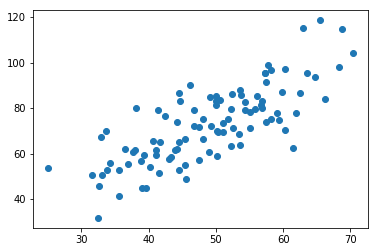

In [15]:
plt.scatter(x,y)
plt.show()

In [8]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [9]:
x_train.shape

(70,)

In [10]:
def fit(x_train,y_train):
    num=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    den=(x_train**2).mean()-x_train.mean()**2
    m=num/den
    c=y_train.mean()-m*x_train.mean()
    return m,c

In [11]:
def predict(x,m,c):
    return m*x+c

def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

def cost(x,y,m,c):
    return ((y-m*x-c)**2).mean()
    

In [12]:
m,c=fit(x_train,y_train)
#test data
y_test_pred=predict(x_test,m,c)
print("Test score:", score(y_test,y_test_pred))

#training data
y_train_pred=predict(x_train,m,c)
print("Train Score:",score(y_train,y_train_pred))
print("m , c ", m,c)

Test score: 0.6164192375888645
Train Score: 0.5903990444857716
m , c  1.3444248840465545 6.509916801331158


In [16]:
xline=np.arange(30,70,0.1)

In [17]:
yline=m*xline+c

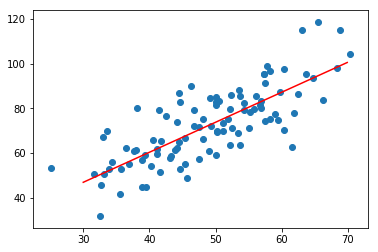

In [20]:
plt.plot(xline,yline,color='r')
plt.scatter(x,y)
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [24]:
x_train=x_train.reshape(-1,1)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
model.score(x_train,y_train)

0.5903990444857716

In [27]:
x_test=x_test.reshape(-1,1)
model.score(x_test,y_test)

0.6164192375888647